In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))

In [99]:
import pandas as pd
import statsmodels.formula.api as smf
import datetime as dt
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat

In [3]:
fileDir = r'C:\Users\Keavan\Jupyter\Economics\Indicator'

In [155]:
def data_export(freq_input): #need to fix data so it is cosistent throughout - adjust for weekly, monthly, yearly data
    
    indicators = pd.read_csv(fileDir + r'\ref\indicators.csv', header = 0)
    indicators_filtered = indicators.loc[indicators['frequency_short'] == freq_input] #filtering frequencies from indicators

    start = '01/01/2007'
    end = '01/01/2019'
    
    index = pd.date_range(start, end, freq='MS')
    df = pd.DataFrame(index = index)
    
    index_count = 0
    
    for i in indicators_filtered['fred_id']:
        completion = (index_count / len(indicators_filtered['fred_id'])) * 100
        df.insert(loc = 0, column = indicators_filtered['code'].iloc[index_count], value = web.DataReader(i, 'fred', start, end), allow_duplicates=False)
        #df[i] = web.DataReader(i, 'fred', start, end)
        print('%.1f%% complete: %s successfully added to dataframe.' % (completion, i))
        index_count += 1
    
    df.index.name = 'Date'
    df = df.dropna()
    df.to_csv(fileDir + r'\data\indicator_data.csv', header = True)
    return df

In [156]:
data_export('M')

0.0% complete: IPB50001N successfully added to dataframe.
1.5% complete: IPB50002N successfully added to dataframe.
3.1% complete: IPB51000N successfully added to dataframe.
4.6% complete: IPB51100N successfully added to dataframe.
6.2% complete: IPB51200N successfully added to dataframe.
7.7% complete: IPB52100N successfully added to dataframe.
9.2% complete: IPB53000N successfully added to dataframe.
10.8% complete: IPB53100N successfully added to dataframe.
12.3% complete: IPB53200N successfully added to dataframe.
13.8% complete: IPMANSICS successfully added to dataframe.
15.4% complete: IPDMAN successfully added to dataframe.
16.9% complete: IPNMAN successfully added to dataframe.
18.5% complete: IPMINE successfully added to dataframe.
20.0% complete: IPUTIL successfully added to dataframe.
21.5% complete: MCUMFN successfully added to dataframe.
23.1% complete: USTRADE successfully added to dataframe.
24.6% complete: USPRIV successfully added to dataframe.
26.2% complete: USGOVT s

,pce,pcepricepressures,ppitottradeindu,cpiallitemcityexfoodenergy,cpiallitemcity,incomerealpersonal,ppiallcomm,cpiexfoodenergy,pceexfoodenergy,ppipulp,...,ipman,ipngm,ipdgm,ipm,ipbe,ipncs,ipdcg,ipcg,ippt,ipti
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-01,9516.3,0.071697,102.2,113.755,117.330,13033.906,164.0,208.600,91.584,153.4,...,107.0457,109.6122,93.5439,94.4205,92.9840,112.3049,114.5052,112.9846,105.4533,101.1293
2007-02-01,9546.8,0.082965,102.4,114.276,117.877,13096.338,166.8,209.135,91.787,156.7,...,107.4548,111.0717,95.9795,95.8639,95.4681,112.5284,122.5788,114.9734,107.4783,102.6892
2007-03-01,9585.1,0.344595,102.7,114.623,118.913,13147.949,169.3,209.418,91.868,157.3,...,108.3845,113.4398,100.7961,97.2706,98.6828,110.0009,126.1709,113.8191,107.5884,103.8859
2007-04-01,9615.7,0.355959,103.1,114.831,119.666,13151.498,171.4,209.747,91.973,158.8,...,109.1097,114.7773,99.0309,96.3714,98.5802,107.3233,124.0360,111.2587,106.0274,102.8756
2007-05-01,9651.3,0.106345,104.6,114.776,120.292,13144.673,173.3,210.058,92.069,160.9,...,109.0226,114.7749,99.8875,97.5014,99.5792,108.0980,124.2393,111.9046,106.8600,103.9157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-01,14138.1,0.042265,131.9,136.814,142.489,16548.593,203.6,258.606,110.257,221.3,...,105.6946,104.3620,109.6513,115.4960,103.0969,102.1688,124.4683,106.6635,104.2543,110.3348
2018-10-01,14221.1,0.074133,133.9,137.100,142.700,16564.283,204.6,258.993,110.409,218.2,...,105.6096,104.8186,110.1203,114.5987,104.5720,100.4195,126.5009,105.6602,104.0106,109.7840
2018-11-01,14266.0,0.127650,134.0,137.029,142.238,16580.853,202.3,259.488,110.616,221.0,...,105.7933,104.7427,108.7973,115.1436,102.5155,102.1950,120.7067,105.9396,103.7678,109.7341


In [175]:
def train_model():
    data = pd.read_csv(fileDir + r'\data\indicator_data.csv', header = 0)
    
    size = int(data.shape[0] * 0.8) #size of training set makes model vary widely
    train, test = data[0:size], data[size:len(data)]
    
    dependent_var = 'pce'
    
    indicators = pd.read_csv(fileDir + r'\ref\indicators.csv', header = 0)
    indicators_filtered = indicators.loc[indicators['frequency_short'] == 'M'] #change when dates/data is fixed
    indicator_list_format = indicators_filtered['code'].tolist()
    
    unwanted = {'cpiallitemcityexfoodenergy', 'cpiallitemcity', 'cpiexfoodenergy', 
                'cpiallitem', 'pcepricepressures', 'pceexfoodenergy', 'pce'}
    indicator_list = [e for e in indicator_list_format if e not in unwanted]
    indicator_regression_list = "+".join([str(i) for i in indicator_list])
    
    lm = smf.ols(formula='{} ~ {}'.format(dependent_var, indicator_regression_list), data=train).fit()
     
    ynewpred = lm.predict(test)

    
    output = pd.DataFrame({'Test': test[dependent_var], 'YPred': ynewpred}).astype(float) #, 'MSE': stat.mean((test['cpiallitem'] - ynewpred)^2)})
    
    
    
    return output.plot(figsize=(15,8))
    #return output
    
    #return lm.summary()
   

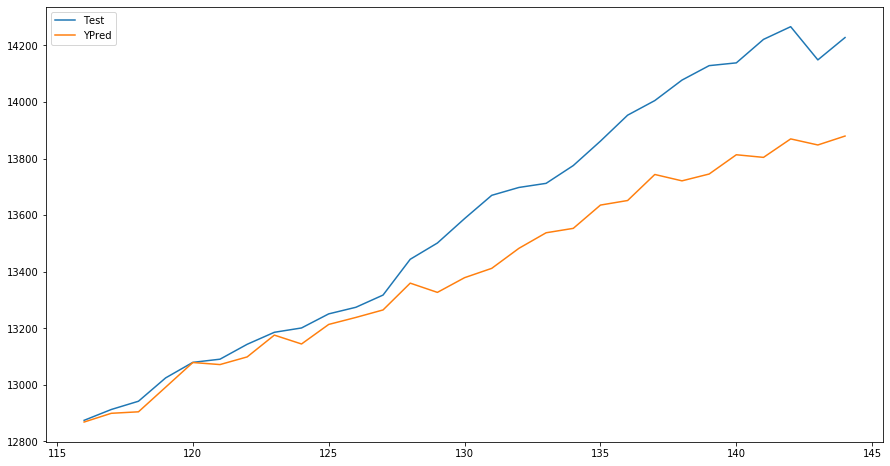

In [176]:
train_model()

In [ ]:
def results_summary(results, fileNameToSave):
    results_df = pd.DataFrame({"pvals":results.pvalues, "coeff":results.params, 
                               "conf_lower":results.conf_int()[0], "conf_higher":results.conf_int()[1]})
    
    results_df = results_df[["coeff","pvals","conf_lower","conf_higher"]]
    results_df = results_df[results_df['pvals'] <= 0.05]
    
    results_df.index.name = 'indicators'
    results_df.to_csv(fileDir + r'\ref\{}.csv'.format(fileNameToSave), header=True)
    
    return results_df

In [ ]:
results_summary(reg_analysis.lm, 'lm_best_indicators')

In [ ]:
def reg_analysis():
    data = pd.read_csv(fileDir + r'\data\indicator_data.csv', header = 0)
    indicators = pd.read_csv(fileDir + r'\ref\indicators.csv', header = 0)
    indicators_filtered = indicators.loc[indicators['frequency_short'] == 'M'] #change when dates/data is fixed
    indicator_list_format = indicators_filtered['code'].tolist()
    
    unwanted = {'cpiallitemcityexfoodenergy', 'cpiallitemcity', 'cpiexfoodenergy', 
                'cpiallitem', 'pcepricepressures', 'pceexfoodenergy'}
    indicator_list = [e for e in indicator_list_format if e not in unwanted]
    indicator_regression_list = "+".join([str(i) for i in indicator_list])
    
    reg_analysis.lm = smf.ols(formula='cpiallitem ~ {}'.format(indicator_regression_list), data=data).fit() #created attribute
 
    return reg_analysis.lm.summary()

In [ ]:
reg_analysis()
